The following is the latex code from the textbook question:

<img src="images/Tut3.3a.JPG" width="700" />
<img src="images/Tut3.3b.JPG" width="700" />
<img src="images/Tut3.3c.JPG" width="700" />
<img src="images/Tut3.3d.JPG" width="700" />
<img src="images/Tut3.3e.JPG" width="700" />
<img src="images/Tut3.3f.JPG" width="700" />

For ease of reference let:

    A = Ethylenebenzene
    B = Styrene
    C = \H_{2}   
    D = Benzene
    E = Ethylene
    F = Toluene
    G = Ethane
    I = inert steam

In [47]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

In [48]:
FAo  =  0.00344 #kmol/s
Tref =      300 #kmol
Toa  =      800 #K for Question a
Tob  =      930 #K for Question b
Toc  =     1100 #K for Question c
FIo   = 14.5*FAo #kmol/s
Finit= FAo + FIo #kmol/s
P    =      2.4 #atm
V    =       10 #m^3
R    =    8.314 #kJ/kmol.K

Heat Capacities:

In [49]:
CpA = 299 #J/kmol.K
CpB = 273 #J/kmol.K
CpC =  30 #J/kmol.K
CpD = 201 #J/kmol.K
CpE =  90 #J/kmol.K
CpF = 249 #J/kmol.K
CpG =  68 #J/kmol.K
CpI =  40 #J/kmol.K

Change in heat capacities of each reaction:

In [50]:
delCp1 = CpB + CpC - CpA 
delCp2 = CpD + CpE - CpA
delCp3 = CpF + CpG - CpA - CpC

In [51]:
rhocat = 2137 #kg/m^3 of pellet
phi    =  0.4 #porosity

Heats of reaction:

In [52]:
delH1Aref = 118000 #kJ/kmol ethylbenzene
delH2Aref = 105200 #kJ/kmol ethylbenzene
delH3Aref = -53900 #kJ/kmol ethylbenzene

Constants for Kp1:

In [53]:
b1 = -17.34
b2 =  -1.302E4
b3 =   5.051
b4 =  -2.314E-10
b5 =   1.302E-6
b6 =  -4.931E-3

Define a function to get calculate from all given equations:

In [54]:
def reactor(var, V):
    [T, FA, FB, FC, FD, FE, FF, FG, FI] = var
    Ftot = FA + FB + FC + FD + FE + FF + FG + FI
    
    Kp1 = exp(b1 + (b2/T) + b3*log(T) +((b4*T + b5)*T + b6)*T) #atm
    
    #mol fractions:
    yA = FA/Ftot
    yB = FB/Ftot
    yC = FC/Ftot
    
    #partial pressures:
    pA = yA*P
    pB = yB*P
    pC = yC*P
    
    #multiple reaction balance:
    # rA = +r1A + r2A + r3A
    # rB = -r1A
    # rC = -r1A + r3A
    # rD = -r2A
    # rE = -r2A
    # rF = -r3A
    # rG = -r3A
    
    #In terms of r1B, r2D and r3F as given:
    # rA = -r1B -r2D -r3F
    # rB = +r1B
    # rC = +r1B -r3F
    # rD = +r2D
    # rE = +r2D
    # rF = +r3F
    # rG = +r3F
    
    r1B = rhocat*(1 - phi)*exp(-0.08539 - (10925/T))*(pA - ((pB * pC)/Kp1))
    r2D = rhocat*(1 - phi)*exp(13.23920 - (25000/T))*(pA)
    r3F = rhocat*(1 - phi)*exp( 0.29610 - (11000/T))*(pA*pC)
    
    delH1A = delH1Aref + delCp1*(T - Tref)
    delH2A = delH2Aref + delCp2*(T - Tref)
    delH3A = delH3Aref + delCp3*(T - Tref)
    
    a = r1B*(-delH1A)+ r2D*(-delH2A)+ r3F*(-delH3A)
    b = FA*CpA + FB*CpB + FC*CpC + FD*CpD + FE*CpE + FF*CpF + FG*CpG + FI*CpI
    
    dTdV = a/b
    dFAdV = -r1B -r2D -r3F
    dFBdV = +r1B
    dFCdV = +r1B -r3F
    dFDdV = +r2D
    dFEdV = +r2D
    dFFdV = +r3F
    dFGdV = +r3F
    dFIdV =    0
    
    return[ dTdV,
           dFAdV,
           dFBdV,
           dFCdV,
           dFDdV,
           dFEdV,
           dFFdV,
           dFGdV,
           dFIdV]

Question a-c Tref=300 K and delCp for the reactions are considered

In [55]:
vspan = linspace(0, V, 1000)

inita = [Toa, FAo, 0, 0, 0, 0, 0, 0, FIo]
initb = [Tob, FAo, 0, 0, 0, 0, 0, 0, FIo]
initc = [Toc, FAo, 0, 0, 0, 0, 0, 0, FIo]

solsa = odeint(reactor, inita, vspan) 
solsb = odeint(reactor, initb, vspan)
solsc = odeint(reactor, initc, vspan)

In [56]:
Ta  = solsa[:,0]
Tb  = solsb[:,0]
Tc  = solsc[:,0]

FBa = solsa[:,2]
FBb = solsb[:,2]
FBc = solsc[:,2]

FDa = solsa[:,4]
FDb = solsb[:,4]
FDc = solsc[:,4]

FFa = solsa[:,6]
FFb = solsb[:,6]
FFc = solsc[:,6]

In [57]:
Sa = FBa[-1]/(FDa[-1] + FFa[-1])
Sb = FBb[-1]/(FDb[-1] + FFb[-1])
Sc = FBc[-1]/(FDc[-1] + FFc[-1])

In [58]:
print(str(FBa[-1]*1000)+'mol/s',str(Sa)+'molB/molA',str(Ta[-1])+'K')
print(str(FBb[-1]*1000)+'mol/s',str(Sb)+'molB/molA',str(Tb[-1])+'K')
print(str(FBc[-1]*1000)+'mol/s',str(Sc)+'molB/molA',str(Tc[-1])+'K')

0.8941585639311079mol/s 19.30762904352131molB/molA 764.8981671695526K
1.9316827561950793mol/s 4.62799832240775molB/molA 850.106016454116K
1.6461352281615487mol/s 0.9434527862626507molB/molA 983.4570460892701K


<img src="images/Tut3.3a.JPG" width="700" />

In [59]:
fa = interp1d(vspan,Ta)
fa([6,2])

array([771.01222388, 786.06016719])

In [60]:
fb = interp1d(vspan,Tb)
fb([6,2])

array([852.9317492 , 874.05982396])

In [61]:
fc = interp1d(vspan,Tc)
fc([6,2])

array([982.48106635, 985.13694064])

For S ratio at 14.5

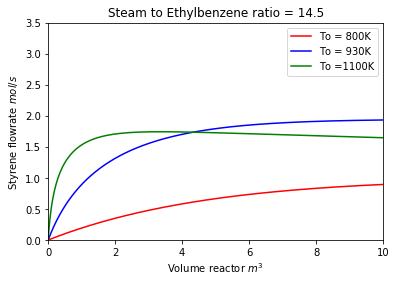

In [62]:
plt.figure(1)
plt.plot(vspan, FBa*1000, color='red', label='To = 800K')
plt.plot(vspan, FBb*1000, color='blue', label='To = 930K')
plt.plot(vspan, FBc*1000, color='green', label='To =1100K')
plt.axis([0,10, 0, 3.5])
plt.legend(loc='best')
plt.title('Steam to Ethylbenzene ratio = 14.5')
plt.ylabel("Styrene flowrate $mol/s$")
plt.xlabel("Volume reactor $m^{3}$")
plt.show()

For S ratio at 50

In [63]:
vspan50 = linspace(0, V, 1000)

inita50 = [Toa, FAo, 0, 0, 0, 0, 0, 0, 50*FAo]
initb50 = [Tob, FAo, 0, 0, 0, 0, 0, 0, 50*FAo]
initc50 = [Toc, FAo, 0, 0, 0, 0, 0, 0, 50*FAo]

solsa50 = odeint(reactor, inita50, vspan50) 
solsb50 = odeint(reactor, initb50, vspan50)
solsc50 = odeint(reactor, initc50, vspan50)

In [64]:
Ta50  = solsa50[:,0]
Tb50  = solsb50[:,0]
Tc50  = solsc50[:,0]

FBa50 = solsa50[:,2]
FBb50 = solsb50[:,2]
FBc50 = solsc50[:,2]

FDa50 = solsa50[:,4]
FDb50 = solsb50[:,4]
FDc50 = solsc50[:,4]

FFa50 = solsa50[:,6]
FFb50 = solsb50[:,6]
FFc50 = solsc50[:,6]

In [65]:
Sa50 = FBa50[-1]/(FDa50[-1] + FFa50[-1])
Sb50 = FBb50[-1]/(FDb50[-1] + FFb50[-1])
Sc50 = FBc50[-1]/(FDc50[-1] + FFc50[-1])

In [66]:
print(str(FBa50[-1]*1000)+'mol/s',str(Sa50)+'molB/molA',str(Ta50[-1])+'K')
print(str(FBb50[-1]*1000)+'mol/s',str(Sb50)+'molB/molA',str(Tb50[-1])+'K')
print(str(FBc50[-1]*1000)+'mol/s',str(Sc50)+'molB/molA',str(Tc50[-1])+'K')

0.545140671230812mol/s 55.725785747236344molB/molA 791.6612130070171K
1.969268794677185mol/s 6.791047535889812molB/molA 897.0889949860093K
1.4817282426064533mol/s 0.7580423421667675molB/molA 1053.2426040365553K


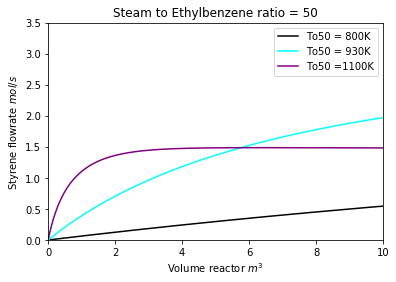

In [67]:
plt.figure(2)
plt.plot(vspan, FBa50*1000, color='black', label='To50 = 800K')
plt.plot(vspan, FBb50*1000, color='cyan', label='To50 = 930K')
plt.plot(vspan, FBc50*1000, color='purple', label='To50 =1100K')
plt.axis([0,10, 0, 3.5])
plt.legend(loc='best')
plt.title('Steam to Ethylbenzene ratio = 50')
plt.ylabel("Styrene flowrate $mol/s$")
plt.xlabel("Volume reactor $m^{3}$")
plt.show()

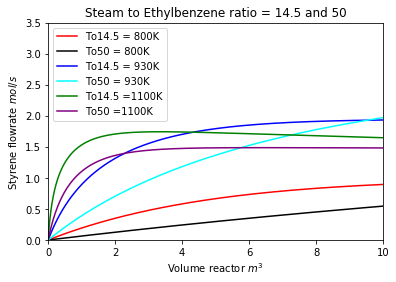

In [68]:
plt.figure(3)
plt.plot(vspan, FBa*1000, color='red', label='To14.5 = 800K')
plt.plot(vspan, FBa50*1000, color='black', label='To50 = 800K')
plt.plot(vspan, FBb*1000, color='blue', label='To14.5 = 930K')
plt.plot(vspan, FBb50*1000, color='cyan', label='To50 = 930K')
plt.plot(vspan, FBc*1000, color='green', label='To14.5 =1100K')
plt.plot(vspan, FBc50*1000, color='purple', label='To50 =1100K')
plt.axis([0,10, 0, 3.5])
plt.legend(loc='best')
plt.title('Steam to Ethylbenzene ratio = 14.5 and 50')
plt.ylabel("Styrene flowrate $mol/s$")
plt.xlabel("Volume reactor $m^{3}$")
plt.show()